# Modelo de regresion lineal simple

Un modelo lineal múltiple puede representarse de la siguiente manera:

\begin{equation}
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \epsilon
\end{equation}

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
salarios = pd. read_csv('Salary.csv')
salarios.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
salarios.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [4]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


## Pregunta a resolver: Determinar cual es el salario de un trabajador baso en el numero de años de experiencia

In [5]:
# sesgos de mis datos
salarios.skew()

YearsExperience    0.420163
Salary             0.209005
dtype: float64

In [6]:
import seaborn as sns

<Axes: xlabel='Salary', ylabel='Count'>

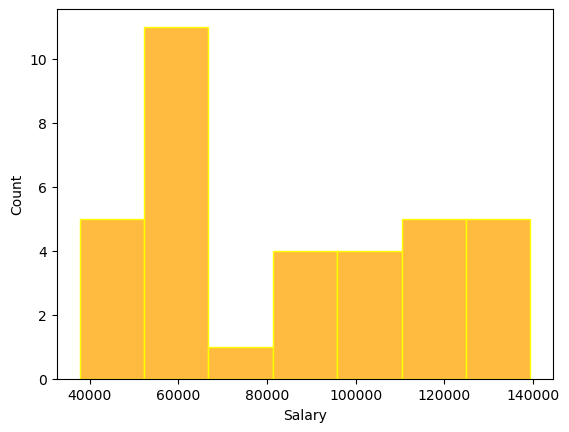

In [7]:
sns.histplot(x=salarios['Salary'], color='orange', edgecolor='yellow')

<Axes: xlabel='YearsExperience', ylabel='Count'>

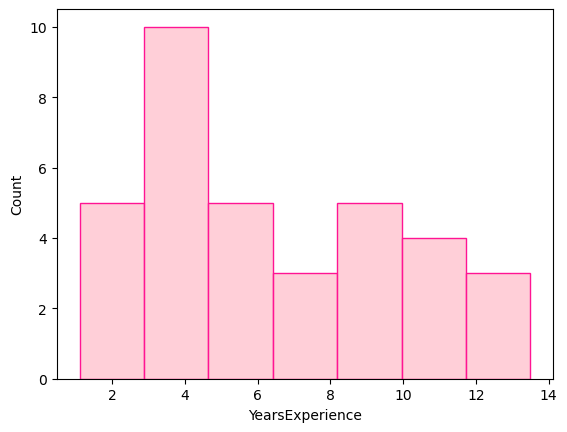

In [8]:
sns.histplot(x=salarios['YearsExperience'], color='pink',edgecolor='deeppink')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

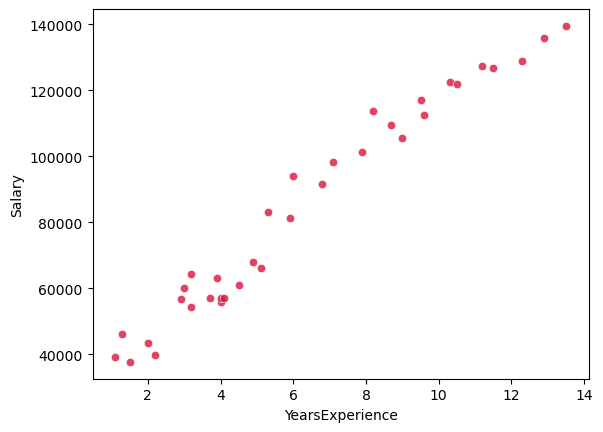

In [9]:
sns.scatterplot(x=salarios['YearsExperience'], y=salarios['Salary'], color='crimson', alpha=0.8)


In [10]:
model=LinearRegression()

In [11]:
X=salarios[['YearsExperience']]
Y=salarios[['Salary']]

In [12]:
Y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [13]:
Y.shape

(35, 1)

In [14]:
lineal_reg=model.fit(X,Y)

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Cargar los datos desde el archivo CSV
datos = pd.read_csv('Salary.csv')

# Separar las características (X) y el objetivo (Y)
X=salarios[['YearsExperience']]
Y=salarios[['Salary']]

# Crear un modelo de regresión lineal
model = LinearRegression()

# se usa fit para entrenar al modelo
model.fit(X, Y)

# Calcular el coeficiente de determinación R^2
r2_score = model.score(X, Y)

print(f"Coeficiente de determinación R^2: {r2_score}")


Coeficiente de determinación R^2: 0.9651633106751443


In [16]:

# Crear un modelo de regresión lineal
model = LinearRegression()

In [17]:
# se usa fit para entrenar al modelo
model.fit(X, Y)

LinearRegression()

In [18]:
y_pred_m = lineal_reg.intercept_ + lineal_reg.coef_ * 5
y_pred_m

array([[72519.23142984]])

In [19]:
lineal_reg.coef_ # coeficiente correspondite al predictor 

array([[8731.94104706]])

In [20]:
lineal_reg.intercept_ #valor del salario cuando años de experiencia es cero

array([28859.52619453])

In [21]:
y_pred = lineal_reg.predict([[2]])

/opt/anaconda3/envs/Diplomado/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
y_pred

array([[46323.40828866]])

In [23]:
y_pred = lineal_reg.predict(X)

In [24]:
lineal_reg.score(X,Y) #explica el 96% de la varinaza de los datos

0.9651633106751443

In [25]:
import matplotlib.pyplot as plt

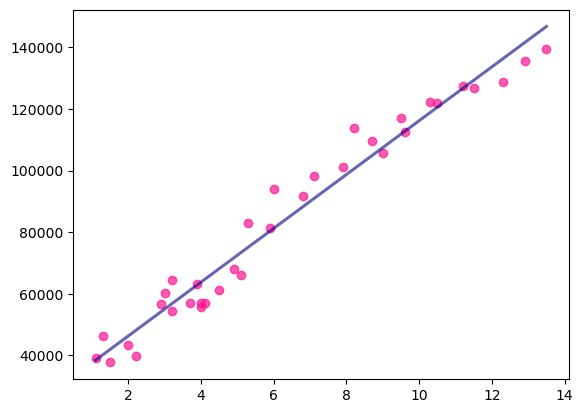

In [26]:
plt.scatter (X,Y,color='deeppink',alpha=.7)
plt.plot(X,y_pred, color='navy', lw=2.2, alpha=.6)
plt. show()

# Regresión lineal multiple

Un modelo lineal múltiple puede representarse de la siguiente manera:

\begin{equation}
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \epsilon
\end{equation}

In [27]:
datos = pd.read_csv('advertising.csv')
datos

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Text(0.5, 1.2, 'Relación entre el gasto en publicidad y las ventas')

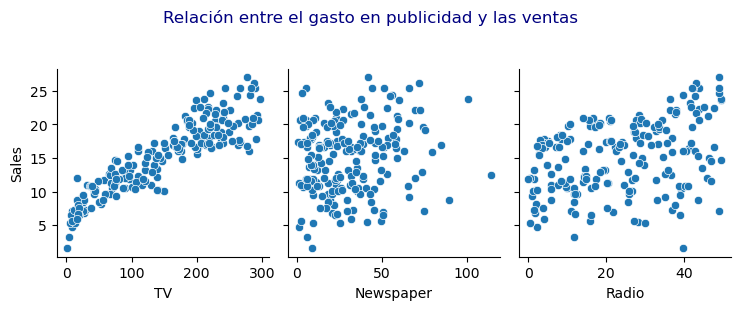

In [28]:
sns.pairplot(datos,x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales')
plt.suptitle('Relación entre el gasto en publicidad y las ventas', color='navy', y=1.2, fontsize=12)


Inversión en TV muestra una fuerte correlación positiva con las ventas. Es una estrategia de publicidad efectiva.

In [29]:
datos.describe()
# no hay datos faltantes


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


1. **count: Número de observaciones.**

TV, Radio, Newspaper, Sales: 200 observaciones.

2. **mean: Media (promedio) de los valores.**

TV: 147.04

Radio: 23.26

Newspaper: 30.55

Sales: 15.13

3. **std: Desviación estándar, que mide la dispersión de los valores alrededor de la media.**

TV: 85.85

Radio: 14.85

Newspaper: 21.78

Sales: 5.28

4. **min: Valor mínimo.**

TV: 0.70

Radio: 0.00

Newspaper: 0.30

Sales: 1.60

**25%: Primer cuartil, el 25% de los datos son menores que este valor.**

TV: 74.38

Radio: 9.98

Newspaper: 12.75

Sales: 11.00

**50%: Mediana, el 50% de los datos son menores que este valor.**

TV: 149.75

Radio: 22.90

Newspaper: 25.75

Sales: 16.00

**75%: Tercer cuartil, el 75% de los datos son menores que este valor.**

TV: 218.83

Radio: 36.53

Newspaper: 45.10

Sales: 19.05

**max: Valor máximo.**

TV: 296.40

Radio: 49.60

Newspaper: 114.00

Sales: 27.00

- Interpretación


Inversión Publicitaria en TV: Tiene una media de 147.04, indicando que en promedio, se invierte una cantidad considerable en publicidad en TV. La desviación estándar de 85.85 sugiere una alta variabilidad en la inversión publicitaria entre diferentes observaciones.


Inversión Publicitaria en Radio: Con una media de 23.26, la inversión en radio es mucho menor en comparación con la TV. La desviación estándar de 14.85 también indica variabilidad, pero menos pronunciada que en TV.


Inversión Publicitaria en Periódicos: La media es de 30.55, sugiriendo una inversión moderada en comparación con TV y Radio. La desviación estándar de 21.78 indica variabilidad en las inversiones.
Sales:

Ventas: La media de 15.13 con una desviación estándar de 5.28 indica que las ventas varían entre las observaciones, pero están centradas alrededor de 15 unidades.

In [30]:
# la inversion afecta a las ventas
# 1 cuartil 
#

<Axes: >

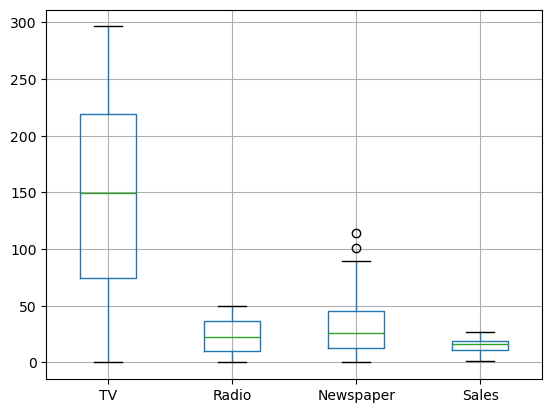

In [31]:
#valores atipicos, box plot
datos.boxplot()

TV distribucion normal y sales

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

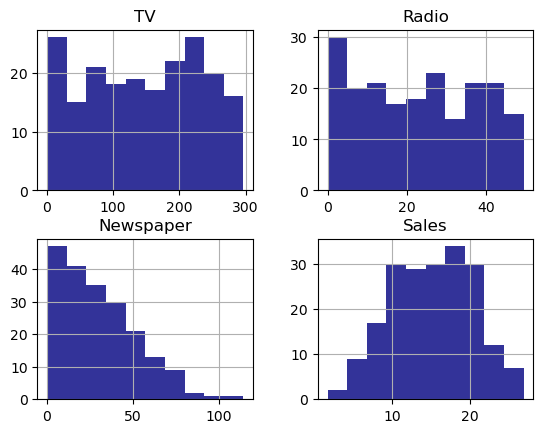

In [32]:
datos.hist(color='navy', alpha=.8)


In [33]:
datos.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Los valores de correlación varían entre -1 y 1, donde:

- 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta, 0 indica que no hay correlación.

TV y Ventas:

- Hay una fuerte relación positiva (0.901) entre la publicidad en TV y las ventas. Esto significa que cuando se invierte más en publicidad en TV, las ventas suelen aumentar significativamente.

Radio y Ventas:

- Existe una correlación moderada (0.350) entre la publicidad en Radio y las ventas. Esto indica que la inversión en publicidad en Radio también tiende a aumentar las ventas, pero no tan drásticamente como la publicidad en TV.

Periódico y Ventas:

- La correlación es baja (0.158) entre la publicidad en Periódico y las ventas. Esto sugiere que la inversión en publicidad en Periódico tiene un impacto limitado en las ventas. Es decir, no contribuye mucho a aumentarlas.


- TV y TV: La correlación es 1.000000, lo cual es esperado ya que cualquier variable está perfectamente correlacionada consigo misma.

- TV y Radio (0.054809): La correlación es baja, lo que indica que no hay una relación lineal fuerte entre la inversión en TV y la inversión en radio.

- TV y Newspaper (0.056648): Similar a la correlación con Radio, esta es también baja, indicando poca relación entre la inversión en TV y la inversión en periódicos.

### VIF (Factor de Inflación de la Varianza) 

El VIF mide cuánto se incrementa la varianza de un coeficiente de regresión debido a la colinealidad entre las variables independientes.
Nos dice cuánto la presencia de una variable específica en el modelo está inflada debido a su correlación con otras variables.

Interpretación del VIF
- VIF = 1: No hay correlación entre la variable independiente y las demás variables independientes.

- 1 < VIF < 5: Existe una correlación moderada, pero generalmente es aceptable.

- VIF > 5: Alta correlación que puede indicar problemas de multicolinealidad.

- VIF > 10: Señal fuerte de multicolinealidad, generalmente considerado problemático.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x=datos[['TV', 'Radio','Newspaper']]
x=add_constant(x)

VIF_data = pd.DataFrame()
VIF_data[ 'Variable'] = x.columns
VIF_data[ 'VIF'] = [variance_inflation_factor(x.values,i) for i
in range(x.shape[1])]

In [35]:
VIF_data 

,Variable,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Newspaper,1.145187


In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [37]:
model= LinearRegression

In [38]:
x = datos[['TV', 'Radio']]
y = datos['Sales']

In [39]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [40]:
df = pd.DataFrame(datos)

# Separar características y objetivo
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Verificar dimensiones
print("Dimensiones de X:", x.shape)
print("Número de muestras en y:", len(y))

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(x, y)


Dimensiones de X: (200, 3)
Número de muestras en y: 200


LinearRegression()

In [41]:
model.fit(x,y)

LinearRegression()

In [42]:
model.intercept_

4.625124078808653

In [43]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

Mi modelo lineal multiple es:
$$
Sales = 4.62 + 0.05 * tv +  0.11* {radio}+ \epsilon
$$

Interpretación.

$\beta_0=4.62$: Este valor indica que, manteniendo constante la inversión en publicidad en TV, radio y periódico en cero, las ventas promedio son de 4.62 unidades. Es el valor base de las ventas cuando no hay inversión publicitaria en ninguno de los tres medios considerados.

$\beta_1=0.05$: Este coeficiente sugiere que, manteniendo constante la inversión en publicidad en radio y en periódico, un aumento de una unidad en la inversión en publicidad en TV se asocia con un incremento promedio de 0.05 unidades en las ventas. En términos prácticos, esto implica que la publicidad en TV tiene un efecto positivo en las ventas, aunque relativamente pequeño.

$\beta_2=0.11$: Este coeficiente indica que, manteniendo constante la inversión en publicidad en TV y en periódico, un aumento de una unidad en la inversión en publicidad en radio se asocia con un incremento promedio de 0.11 unidades en las ventas. Esto sugiere que la publicidad en radio es más efectiva que la publicidad en TV para aumentar las ventas.

$\beta_3=0$: Este valor indica que, manteniendo constante la inversión en publicidad en TV y radio, la inversión en publicidad en periódico no tiene un impacto significativo en las ventas. En otras palabras, según este modelo, invertir en publicidad en periódico no contribuye a un aumento en las ventas.



In [44]:
sales_pred = model.predict(x)

In [45]:
sales_pred

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

/var/folders/_z/glm0pml56zb87fyw3y16n42w0000gn/T/ipykernel_9205/3459445300.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot([sales_pred.min(), sales_pred.max()], [sales_pred.min(), sales_pred.max()], '-r', color='yellowgreen', lw=2.2,alpha=0.9)


Text(0.5, 1.0, 'Sales')

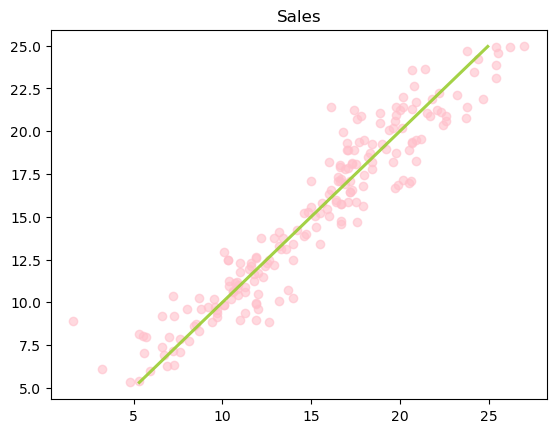

In [46]:
plt. scatter(datos[ 'Sales'],sales_pred, color='pink', alpha=0.6)
plt.plot([sales_pred.min(), sales_pred.max()], [sales_pred.min(), sales_pred.max()], '-r', color='yellowgreen', lw=2.2,alpha=0.9)
plt.title('Sales')

In [47]:
model.score(x,y) # model.score(matriz de entrada, valores reales)

0.9025912899684558

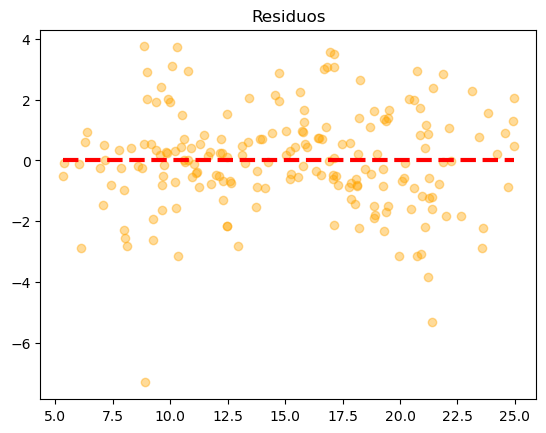

In [48]:
residuos = y-sales_pred
plt.scatter(sales_pred,residuos, color='orange', alpha=0.4)
plt.hlines(y=0, xmin=sales_pred.min(), xmax=sales_pred.max(), colors='red', linestyles='--', lw=3)
plt.title('Residuos')
plt.show()

# OLS (Ordinary Least Squares)

In [49]:
import statsmodels.api as sm 
from statsmodels.tools.tools import add_constant

In [50]:
x_2 = datos [['TV', 'Radio' ]]
y_2 = add_constant(x_2) 
y_2= datos['Sales']

In [51]:
y_2

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [52]:
model_2 = sm.OLS(y_2,x_2).fit()
model_2.params

TV       0.068866
Radio    0.182664
dtype: float64

In [53]:
model_2.summary()
#metodo de minimos cuadrados

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              3999.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):                   8.33e-161
Time:                        22:56:34   Log-Likelihood:                         -466.26
No. Observations:                 200   AIC:                                      936.5
Df Residuals:                     198   BIC:                                      943.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0689      0.002     44.261      0.000       0.066       0.072
Radio          0.1827      0.010     19.027      0.000       0.164       0.202
==============================================================================
Omnibus:                        0.092   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.050
Skew:                           0.038   Prob(JB):                        0.975
Kurtosis:                       2.987   Cond. No.                         9.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coeficientes:

- TV: 0.0689 - Un aumento de 1 unidad en la inversión en TV se asocia con un incremento de aproximadamente 0.0689 unidades en las ventas, manteniendo las demás variables constantes.
- Radio: 0.1827 - Un aumento de 1 unidad en la inversión en Radio se asocia con un incremento de aproximadamente 0.1827 unidades en las ventas, manteniendo las demás variables constantes.
Valores p (P>|t|):

- TV: 0.000 - El valor p es menor a 0.05, indicando que la inversión en TV tiene un efecto significativo en las ventas.
Radio: 0.000 - El valor p es menor a 0.05, indicando que la inversión en Radio también tiene un efecto significativo en las ventas.


Estadísticos:

- F-statistic: 3999. - Un valor muy alto, indicando que el modelo en conjunto es significativo.

- Prob (F-statistic): 8.33e-161 - Un valor extremadamente bajo, lo que refuerza que el modelo en su totalidad es significativo.

- Log-Likelihood: -466.26 - Es una medida de la bondad del ajuste del modelo; no se interpreta directamente sino en comparación con otros modelos.

- AIC (936.5) y BIC (943.1) - Son criterios de información que ayudan a evaluar la calidad del modelo; valores más bajos indican un mejor modelo.

Diagnósticos del Modelo:

- Omnibus: 0.092, Prob (Omnibus): 0.955 - Indican que los residuos (errores del modelo) se distribuyen de manera normal.

- Durbin-Watson: 2.028 - Está cerca de 2, lo que sugiere que no hay autocorrelación significativa de los residuos.

- Jarque-Bera (JB): 0.050, Prob (JB): 0.975 - Refuerzan que los residuos se distribuyen normalmente.

- Skew: 0.038 y Kurtosis: 2.987 - Indican que la distribución de los residuos es bastante simétrica y no hay problemas significativos de curtosis (cola de la distribución).

## PCA

- Reducir Dimensionalidad: Menos variables, más información conservada.

- Multicolinealidad: Soluciona problemas de correlación alta entre variables.

- Componentes Principales: Nuevas variables no correlacionadas que capturan la variabilidad original.

## Pasos para Usar PCA en Regresión:

Estandarizar Datos:

     - Igualar escala: Restar media y dividir por desviación estándar.

Calcular Componentes Principales:

     - Transformar variables originales en componentes principales.
Seleccionar Componentes Principales:

     - Elegir componentes con mayor variabilidad.
     - Usar gráfica de codo (scree plot) para decidir cuántos retener.
     
Regresión con Componentes Principales:

     - Usar componentes seleccionados como nuevas variables independientes.


# REGRESION LINEAL CON PCR (Regresión por Componentes Principales)


 Técnica que combina el Análisis de Componentes Principales (PCA) con la regresión lineal. Se utiliza para resolver problemas de multicolinealidad y reducir la dimensionalidad en modelos de regresión.

**Pasos para Usar PCR**

1. Estandarizar Datos:

Asegurar que todas las variables tienen la misma escala. Esto se hace restando la media y dividiendo por la desviación estándar de cada variable.

2. Calcular Componentes Principales:

Usar PCA para transformar las variables originales en un nuevo conjunto de variables no correlacionadas (componentes principales).

3. Seleccionar Componentes Principales:

Elegir los componentes principales que explican la mayor parte de la variabilidad de los datos originales.

4. Regresión Lineal con Componentes Principales:

Usar los componentes principales seleccionados como variables independientes en el modelo de regresión lineal.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
datos= pd.read_csv('advertising.csv')
datos .head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [56]:
modelo = Pipeline([('scaler', StandardScaler()),
    ('pca', PCA()),
    ('regresion', LinearRegression())])

In [57]:
x =datos[["TV","Radio","Newspaper"]]
y = datos["Sales"]

In [58]:
modelo.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('regresion', LinearRegression())])

In [59]:
modelo.predict(x) #prediccion de mi modelo

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [60]:
modelo.named_steps['regresion'] 

LinearRegression()

In [61]:
regresor = modelo.named_steps['regresion'] 

In [62]:
regresor.intercept_

15.130500000000001

In [63]:
regresor.coef_

array([ 2.06992121,  4.32260897, -1.13244033])

Mi modelo lineal multiple es:  
$$
Y = 15.13 + 2.06 tv +  4.32 {radio}-1.1 newspaper+ \epsilon
$$

los coeficientes cooresponde a  PCA es decir los datos transformados

#### Matriz de transformacion de mis datos

In [64]:
#pca algoritmo de lenguaje automatico, pca extrae datos representatvos de cada una de las variables y se usa para aplicar regresion o otro metodo
pca=modelo.named_steps['pca']
pca.components_

array([[ 0.20787391,  0.69139674,  0.69192412],
       [ 0.97814838, -0.14965532, -0.14432267],
       [-0.0037659 , -0.70680537,  0.70739804]])

In [65]:
from sklearn.metrics import r2_score
score=r2_score(y,modelo.predict(x))

# REGRESIÓN MODELOS NO LINEALES

### Regresión Logística

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
datos = pd.read_csv('ExpansiónCobre.csv')
datos. head()

,Expansión,Kelvin
0,0.591,24.41
1,1.547,34.82
2,2.902,44.09
3,2.894,45.07
4,4.703,54.98


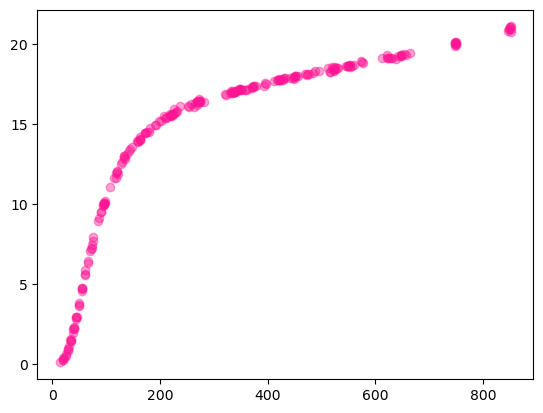

In [68]:
plt.scatter(datos['Kelvin'], datos['Expansión'],color='deeppink', alpha=0.4)

In [69]:
def logistica(t,a,m,n,tau):
    return a*(1+m*np.exp (-t/tau))/(1+n*np.exp(-t/tau))


In [70]:
X = datos ['Kelvin'].values
y = datos ['Expansión'].values

In [71]:
from scipy.optimize import curve_fit #metodo de optimizacion 

In [72]:
params, params_cov = curve_fit(logistica,X,y) #params son los coeficientes de los paramentros a,m,n, tau

In [73]:
params 

array([ 21.26871031,  -1.02756747,  -0.92782738, 900.98890789])

In [74]:
y_pred = logistica(X, *params)

In [75]:
from sklearn.metrics import r2_score, mean_squared_error

In [76]:
r2_score (y,y_pred)

0.9906355897156159

In [77]:
mean_squared_error(y,y_pred)

0.3103059765188465

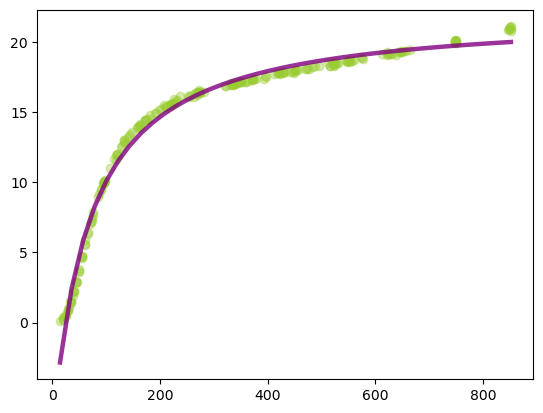

In [78]:
kelvin = np.linspace(X.min(),X.max(),40)
plt.scatter (X,y,color='yellowgreen', alpha=0.38)
plt.plot(kelvin,logistica(kelvin,*params),color='purple', linewidth=3.2, alpha=.8)

## Regresión Polinomial
La regresión polinomial permite ajustar relaciones no lineales entre variables. 

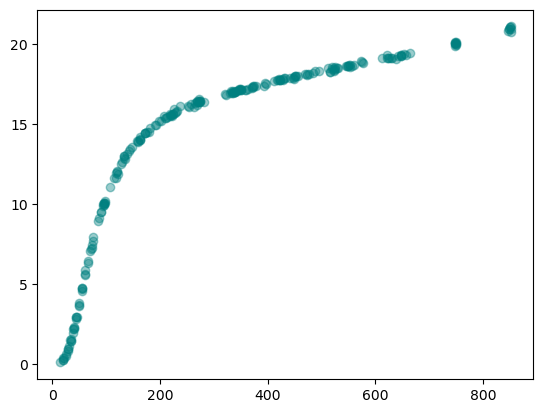

In [79]:
plt.scatter(datos['Kelvin'], datos['Expansión'],color='teal', alpha=0.4)

In [80]:
def polinomio(x, a, b, c, d,e,f):
    return a + b* x+c * x**2+d* x**3+e* x**4+f* x**5

In [81]:
X = datos ['Kelvin'].values
y = datos ['Expansión'].values

In [82]:
from scipy.optimize import curve_fit

In [83]:
params_, params_cov_ = curve_fit(polinomio, X,y)

In [84]:
params_

array([-4.74997481e+00,  2.24468164e-01, -9.39083209e-04,  1.94744189e-06,
       -1.93606704e-09,  7.39487087e-13])

In [85]:
params_cov_

array([[ 1.17549256e-02, -2.68247157e-04,  1.79005149e-06,
        -4.94196396e-09,  5.98688982e-12, -2.63260573e-15],
       [-2.68247157e-04,  7.28533350e-06, -5.23625861e-08,
         1.50678856e-10, -1.87424807e-13,  8.39284045e-17],
       [ 1.79005149e-06, -5.23625861e-08,  3.95989580e-10,
        -1.17898556e-12,  1.50208579e-15, -6.84533881e-19],
       [-4.94196396e-09,  1.50678856e-10, -1.17898556e-12,
         3.59950984e-15, -4.67311842e-18,  2.16048689e-21],
       [ 5.98688982e-12, -1.87424807e-13,  1.50208579e-15,
        -4.67311842e-18,  6.15724027e-21, -2.88000529e-24],
       [-2.63260573e-15,  8.39284045e-17, -6.84533881e-19,
         2.16048689e-21, -2.88000529e-24,  1.35986392e-27]])

TypeError: polinomio() missing 2 required positional arguments: 'e' and 'f'

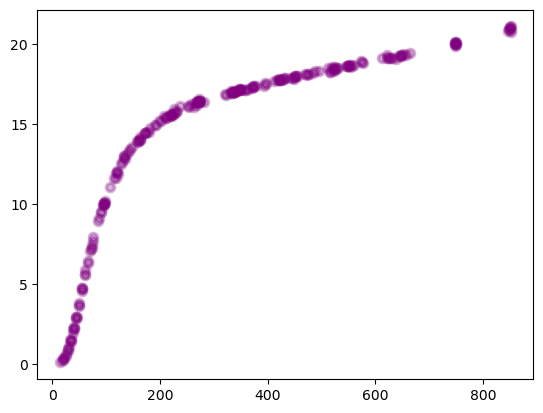

In [86]:
kelvin = np.linspace(X.min(),X.max(), 40)
plt. scatter(X,y, color='purple', alpha=0.3, lw=2.4)
plt.plot(kelvin, polinomio (kelvin, *params), color='yellowgreen', lw=3.6,alpha=0.8)

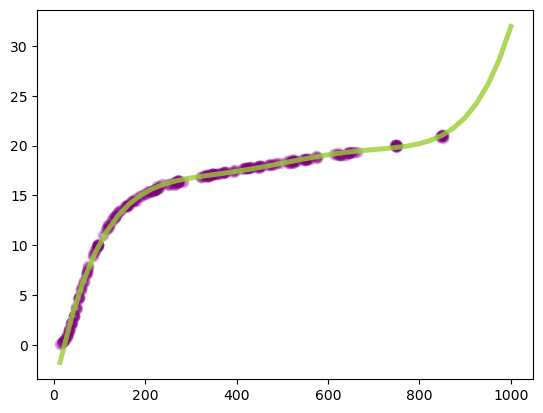

In [ ]:
kelvin = np.linspace(X.min(),1000, 40)
plt. scatter(X,y, color='purple', alpha=0.3, lw=2.4)
plt.plot(kelvin, polinomio (kelvin, *params), color='yellowgreen', lw=3.6,alpha=0.8)


In [ ]:
y_pred_=polinomio(X,*params_)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
r2_score(y,y_pred_)

0.9976197258484248

# División dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('ExpansiónCobre.csv')
X= df['Kelvin'].values.reshape(-1,1)
y = df['Expansión'].values

In [ ]:
X.shape

(236, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(188, 1)

In [ ]:
X_train

array([[330.14],
       [549.53],
       [515.65],
       [ 72.08],
       [487.27],
       [ 60.9 ],
       [158.63],
       [848.23],
       [ 33.43],
       [118.82],
       [548.75],
       [544.47],
       [553.56],
       [ 45.07],
       [851.37],
       [647.04],
       [749.27],
       [522.62],
       [213.32],
       [268.99],
       [ 75.7 ],
       [ 44.66],
       [427.38],
       [372.72],
       [ 94.33],
       [223.26],
       [346.62],
       [638.59],
       [663.97],
       [ 20.15],
       [377.98],
       [192.11],
       [172.74],
       [394.77],
       [269.44],
       [347.19],
       [345.65],
       [416.59],
       [226.44],
       [393.32],
       [158.67],
       [519.54],
       [120.25],
       [339.79],
       [447.41],
       [221.39],
       [336.25],
       [850.98],
       [134.03],
       [455.56],
       [646.9 ],
       [ 33.91],
       [ 50.24],
       [ 44.09],
       [163.48],
       [524.7 ],
       [250.99],
       [ 24.33],
       [428.58

In [ ]:
Y_train

array([16.926, 18.61 , 18.237,  7.169, 18.276,  5.602, 13.871, 20.935,
        1.504, 11.946, 18.645, 18.627, 18.669,  2.894, 20.743, 19.268,
       20.065, 18.357, 15.455, 16.438,  7.898,  2.951, 17.756, 17.368,
        9.835, 15.627, 17.159, 19.074, 19.398,  0.367, 17.349, 14.947,
       14.452, 17.576, 16.334, 17.116, 17.122, 17.764, 15.908, 17.339,
       13.926, 18.404, 12.005, 17.009, 17.877, 15.499, 16.915, 21.085,
       12.786, 17.993, 19.252,  1.429,  3.697,  2.902, 13.974, 18.566,
       16.131,  0.471, 17.808, 20.107, 19.09 , 16.181, 17.793, 15.483,
       19.371,  0.591, 11.023, 20.088, 19.972, 19.33 , 16.337, 16.423,
       20.049, 15.639, 15.379, 18.291, 19.324, 17.858, 18.046, 14.067,
        1.903, 14.464,  9.136, 18.523, 20.935, 17.355,  5.556, 19.133,
       17.206, 12.035, 20.062, 17.121, 17.123, 17.736, 18.924, 17.768,
       12.596, 15.814, 19.89 , 17.483, 18.795, 15.381,  1.547,  0.08 ,
       17.848, 18.706, 20.93 , 18.426, 16.872,  1.418, 14.755,  0.375,
      

### modelo polinomial

In [ ]:
def polinomio(x, a, b, c, d,e,f):
    return a + b* x+c * x**2+d* x**3+e* x**4+f* x**5

In [ ]:
from scipy.optimize import curve_fit 
from sklearn.metrics import r2_score, mean_squared_error
params, params_cov= curve_fit(polinomio,X_train.flatten(),Y_train)

y_pred_train = polinomio(X_train, *params)
y_pred_test = polinomio(X_test, *params)


In [ ]:
mean_squared_error(Y_train,y_pred_train)

0.07893629985504495

In [ ]:
mean_squared_error(Y_test,y_pred_test)

0.0798065332040447